# Raisin Class Prediction

Data Set Information:

Images of Kecimen and Besni raisin varieties grown in Turkey were obtained with CVS. A total of 900 raisin grains were used, including 450 pieces from both varieties. These images were subjected to various stages of pre-processing and 7 morphological features were extracted. These features have been classified using three different artificial intelligence techniques.


Attribute Information:

1. Area: Gives the number of pixels within the boundaries of the raisin.
2. Perimeter: It measures the environment by calculating the distance between the boundaries of the raisin and the pixels around it.
3. MajorAxisLength: Gives the length of the main axis, which is the longest line that can be drawn on the raisin.
4. MinorAxisLength: Gives the length of the small axis, which is the shortest line that can be drawn on the raisin.
5. Eccentricity: It gives a measure of the eccentricity of the ellipse, which has the same moments as raisins.
6. ConvexArea: Gives the number of pixels of the smallest convex shell of the region formed by the raisin.
7. Extent: Gives the ratio of the region formed by the raisin to the total pixels in the bounding box.
8. Class: Kecimen and Besni raisin.

# Import libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline
#%matplotlib notebook
plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.set_option('display.float_format', lambda x: '%.3f' % x)
from mpl_toolkits.mplot3d import Axes3D
from summarytools import dfSummary

## Exploratory Data Analysis and Visualization

In [2]:
df = pd.read_excel("Raisin_Dataset.xlsx")

In [3]:
df_raisin = df.copy()

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             900 non-null    int64  
 1   MajorAxisLength  900 non-null    float64
 2   MinorAxisLength  900 non-null    float64
 3   Eccentricity     900 non-null    float64
 4   ConvexArea       900 non-null    int64  
 5   Extent           900 non-null    float64
 6   Perimeter        900 non-null    float64
 7   Class            900 non-null    object 
dtypes: float64(5), int64(2), object(1)
memory usage: 56.4+ KB


In [5]:
df["Class"] = df["Class"].map({"Kecimen": 0, "Besni": 1})

In [6]:
df.sample(10)

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
690,88250,478.482,238.322,0.867,92397,0.607,1217.127,1
221,64988,371.354,226.910,0.792,67847,0.670,1048.186,0
172,58741,345.485,222.382,0.765,60701,0.715,948.233,0
629,83059,440.560,243.637,0.833,88806,0.686,1238.163,1
407,73311,391.868,239.602,0.791,74825,0.690,1046.520,0
667,104385,488.898,277.684,0.823,108197,0.772,1315.843,1
395,31275,264.687,156.396,0.807,33540,0.658,727.561,0
266,58734,367.484,205.021,0.830,59845,0.757,945.191,0
147,54428,339.115,206.646,0.793,56175,0.723,922.878,0
11,43725,301.322,186.951,0.784,45021,0.697,818.873,0


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Area,900.000,87804.128,39002.111,25387.000,59348.000,78902.000,105028.250,235047.000
MajorAxisLength,900.000,430.930,116.035,225.630,345.443,407.804,494.187,997.292
MinorAxisLength,900.000,254.488,49.989,143.711,219.111,247.848,279.889,492.275
Eccentricity,900.000,0.782,0.090,0.349,0.742,0.799,0.843,0.962
ConvexArea,900.000,91186.090,40769.290,26139.000,61513.250,81651.000,108375.750,278217.000
Extent,900.000,0.700,0.053,0.380,0.671,0.707,0.735,0.835
Perimeter,900.000,1165.907,273.764,619.074,966.411,1119.509,1308.390,2697.753
Class,900.000,0.500,0.500,0.000,0.000,0.500,1.000,1.000


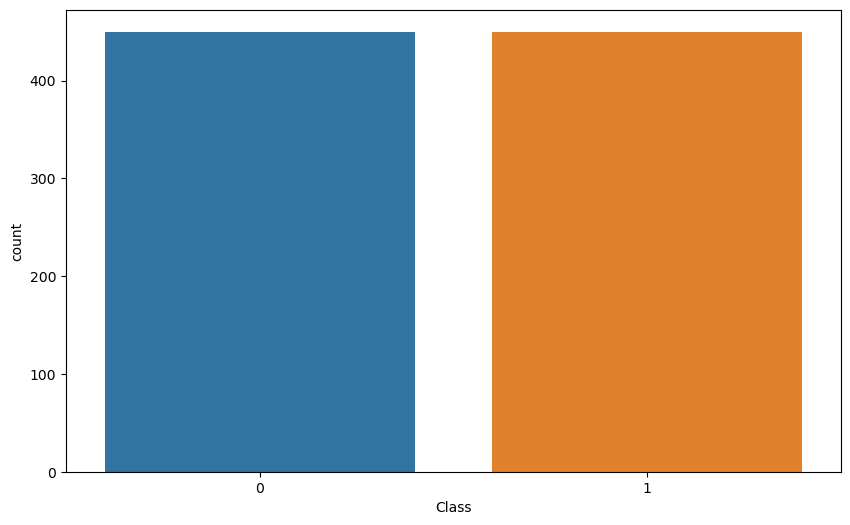

In [8]:
sns.countplot(df["Class"]);

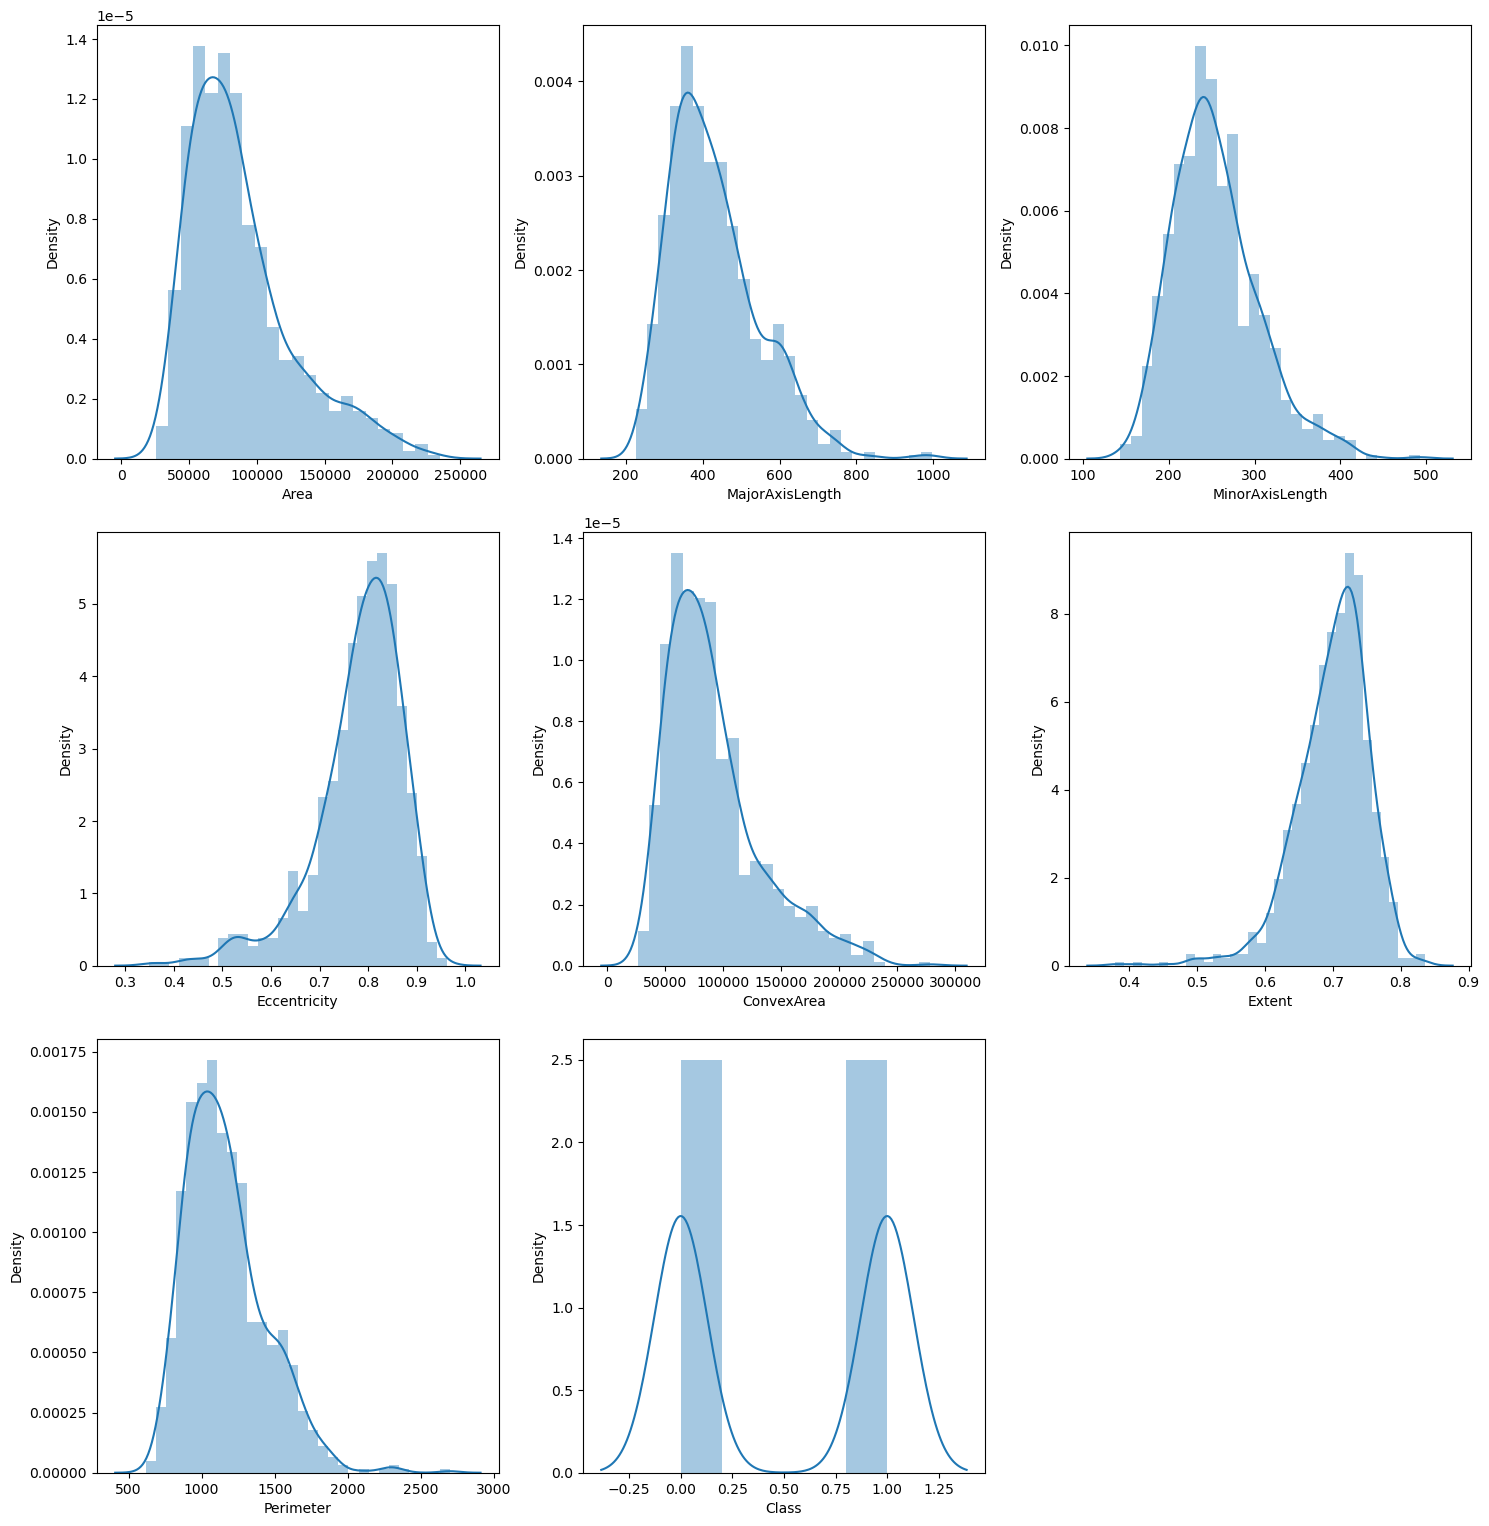

In [9]:
plt.figure(figsize = (15, 20))
plotnumber = 1
for column in df:
    if plotnumber <= 10:
        ax = plt.subplot(4, 3, plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column)
    plotnumber += 1
plt.tight_layout()
plt.show()

In [10]:
df.corr()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
Area,1.000,0.933,0.907,0.336,0.996,-0.013,0.961,0.626
MajorAxisLength,0.933,1.000,0.728,0.584,0.945,-0.204,0.978,0.673
MinorAxisLength,0.907,0.728,1.000,-0.028,0.896,0.145,0.827,0.503
Eccentricity,0.336,0.584,-0.028,1.000,0.348,-0.361,0.448,0.438
ConvexArea,0.996,0.945,0.896,0.348,1.000,-0.055,0.977,0.626
Extent,-0.013,-0.204,0.145,-0.361,-0.055,1.000,-0.173,-0.155
Perimeter,0.961,0.978,0.827,0.448,0.977,-0.173,1.000,0.666
Class,0.626,0.673,0.503,0.438,0.626,-0.155,0.666,1.000


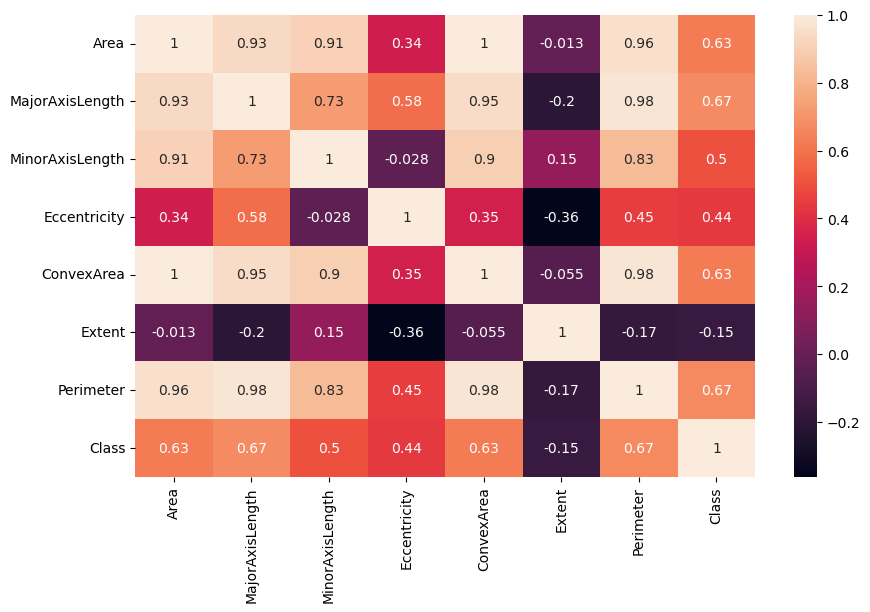

In [11]:
sns.heatmap(df.corr(), annot = True);

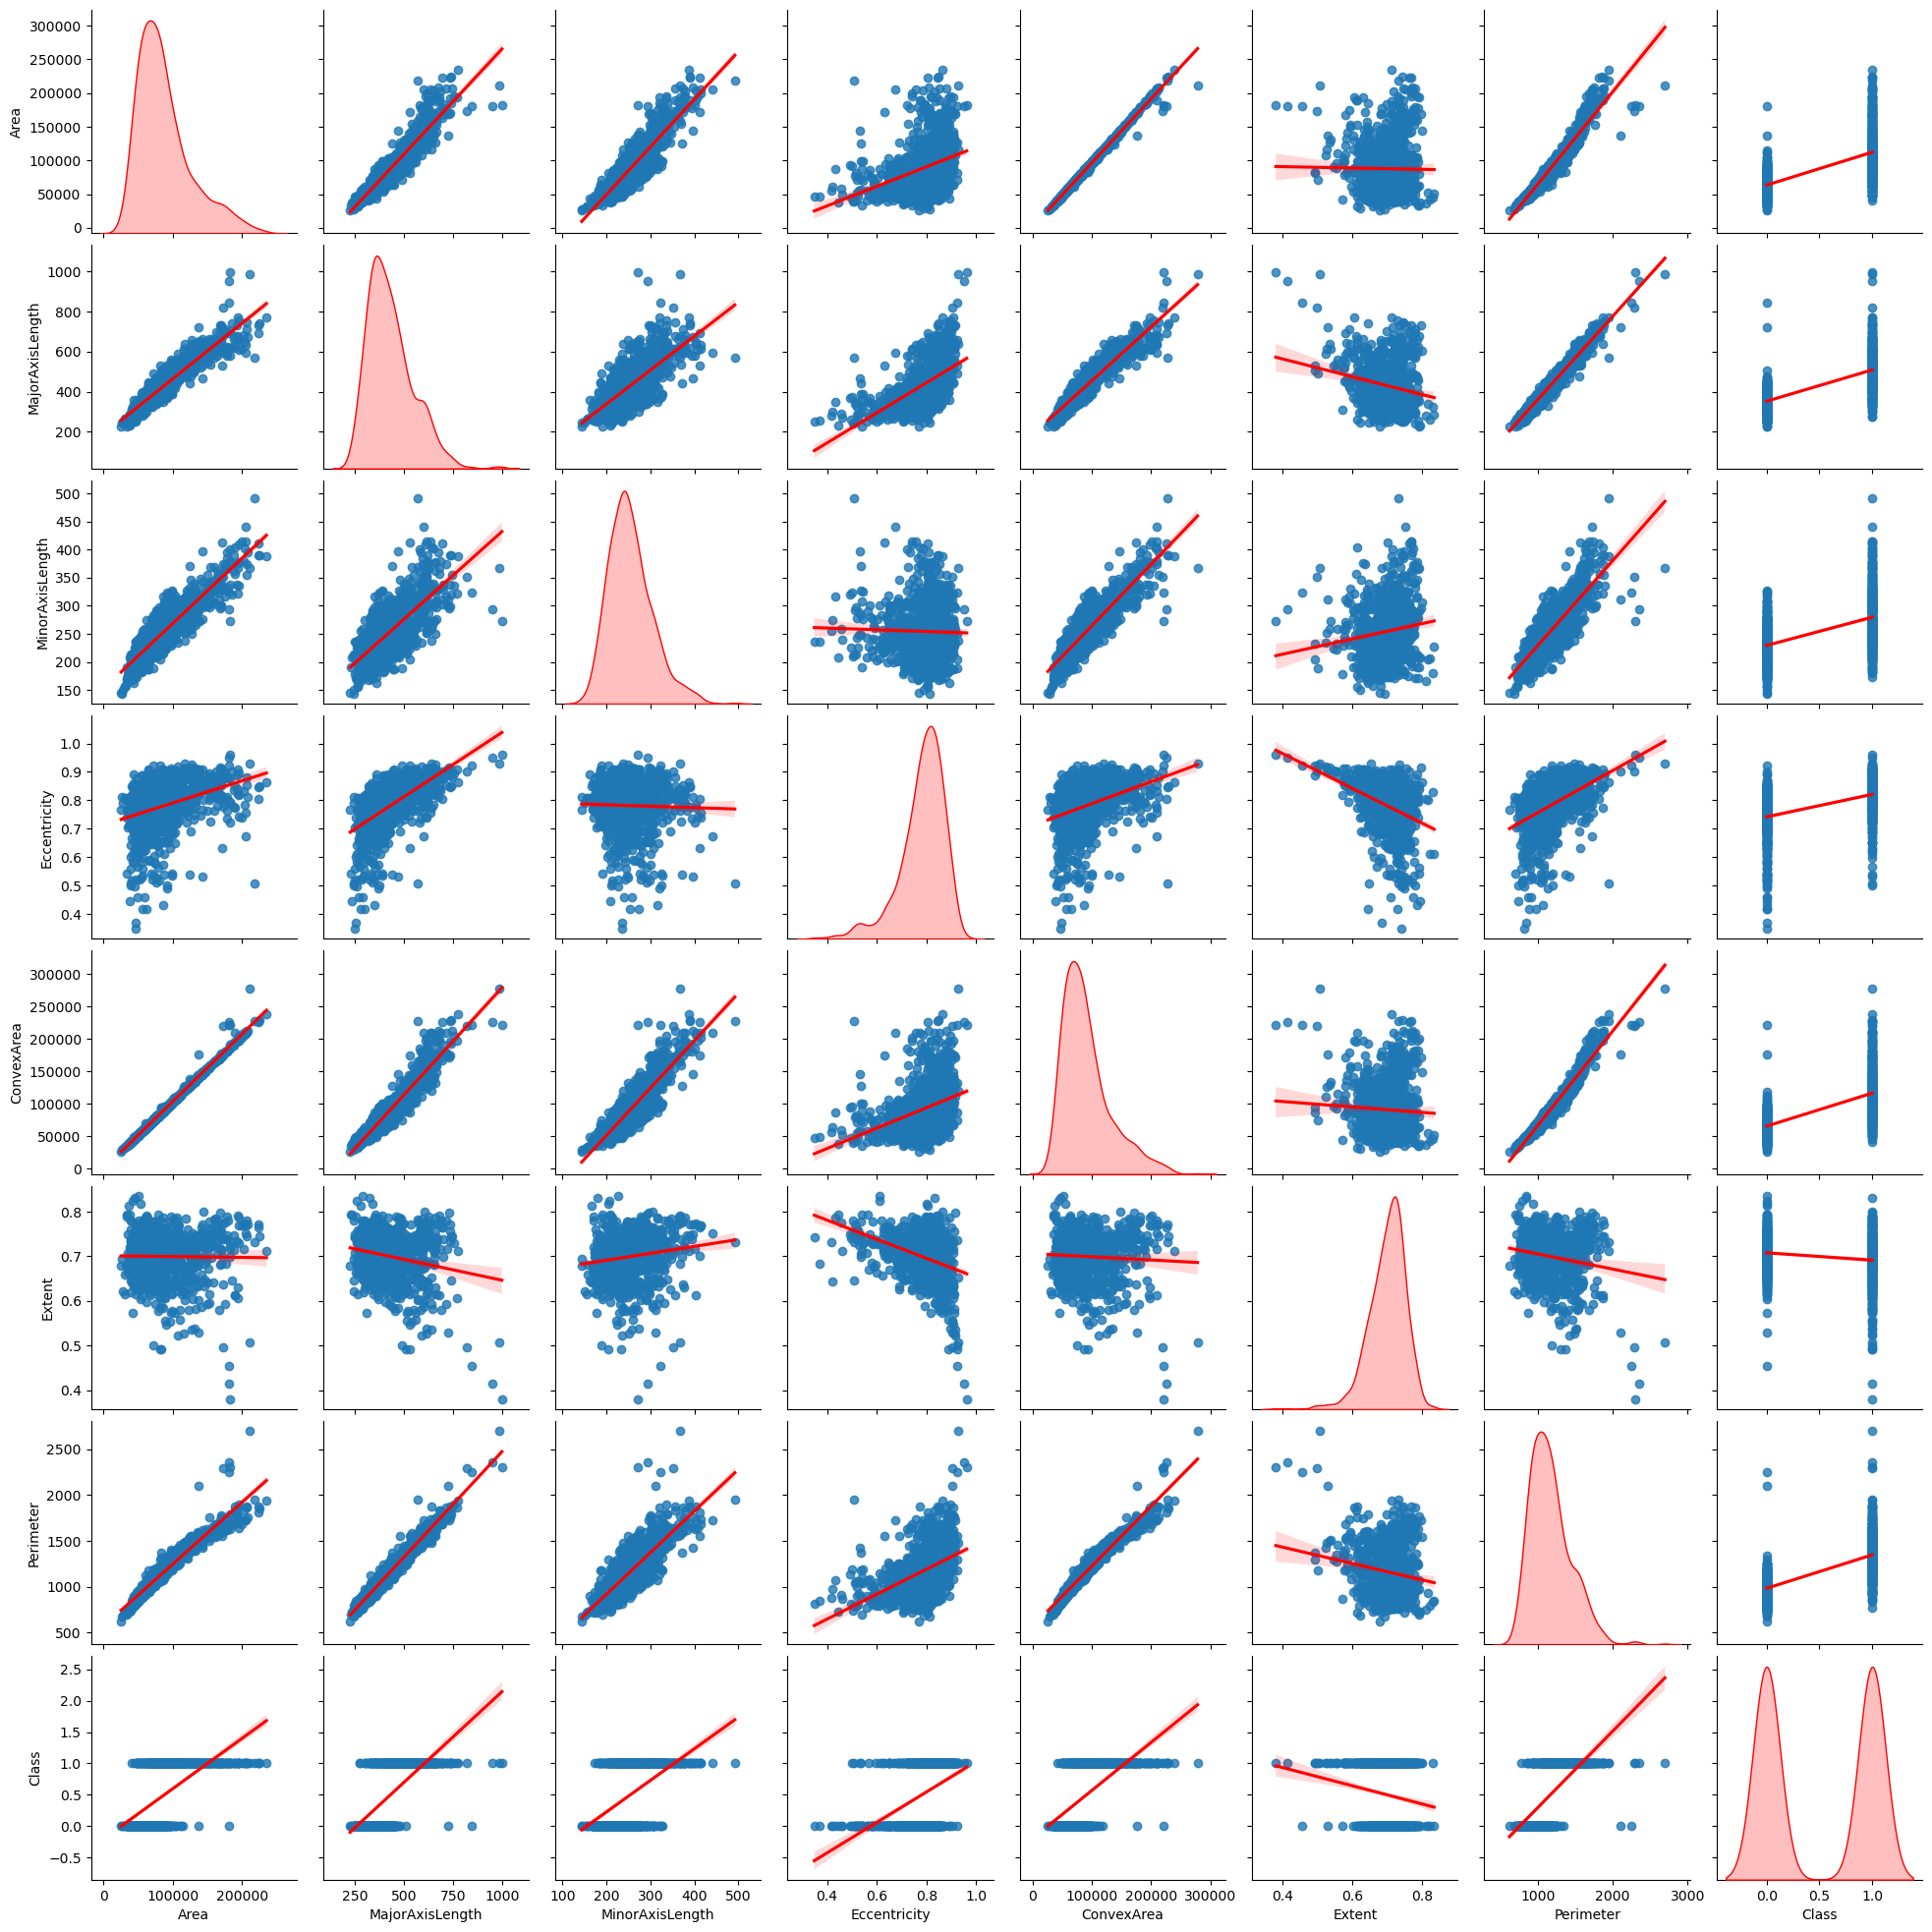

In [12]:
sns.pairplot(df,
             kind = "reg", 
             diag_kind = "kde", 
             diag_kws={"color":"red"}, 
             plot_kws={"line_kws":{"color":"red"}});

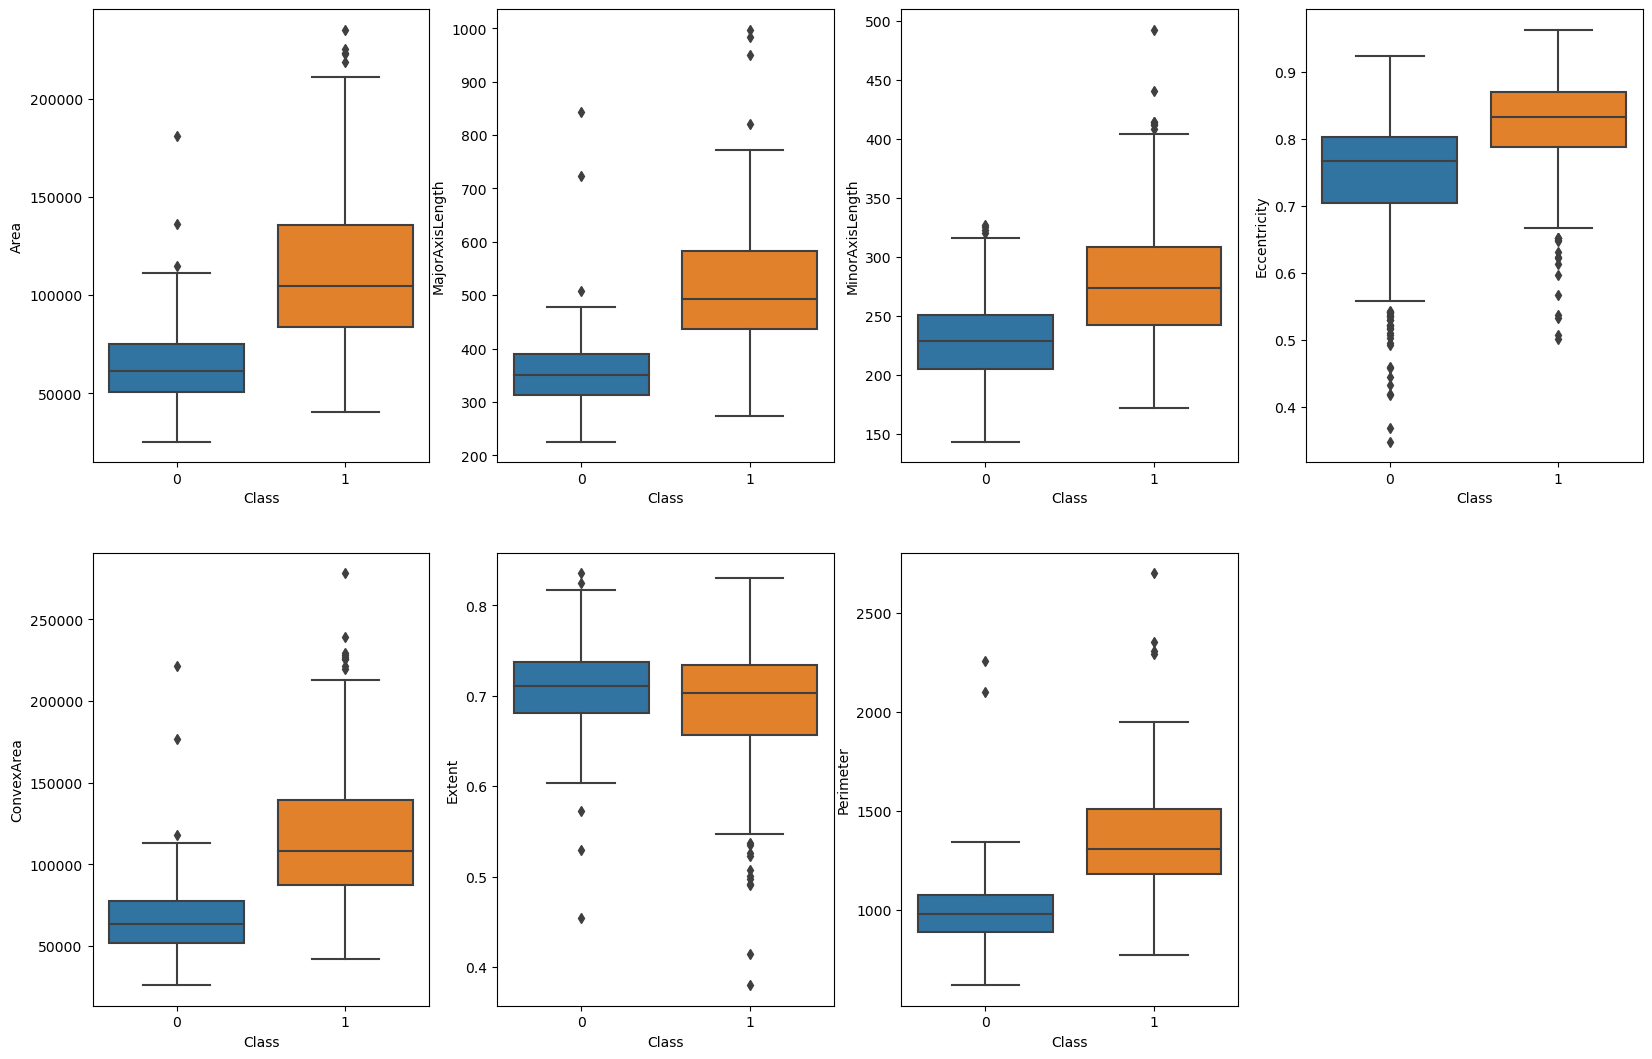

In [13]:
index = 0
plt.figure(figsize=(20,20))
for feature in df.columns:
    if feature != "Class":
        index += 1
        plt.subplot(3,4,index)
        sns.boxplot(x='Class',y=feature,data=df)
plt.show()

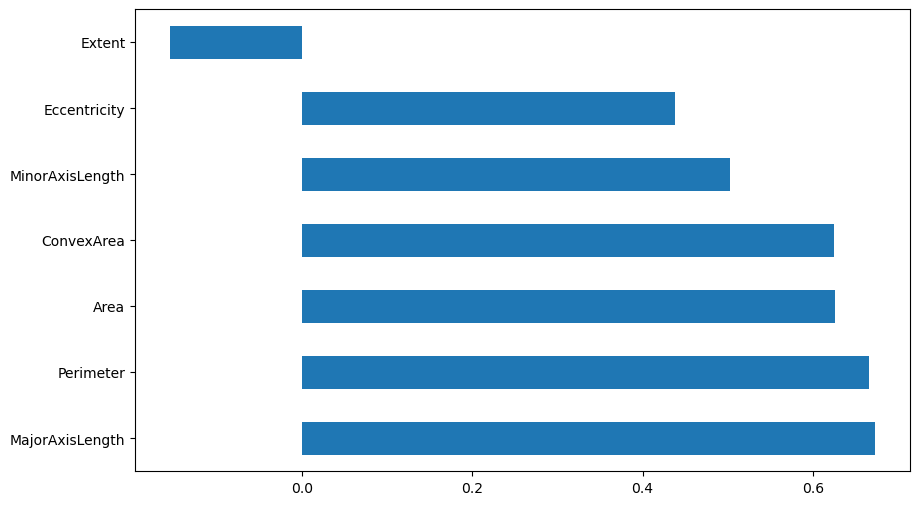

In [14]:
df.corr()["Class"].drop("Class").sort_values(ascending=False).plot.barh()
plt.show()

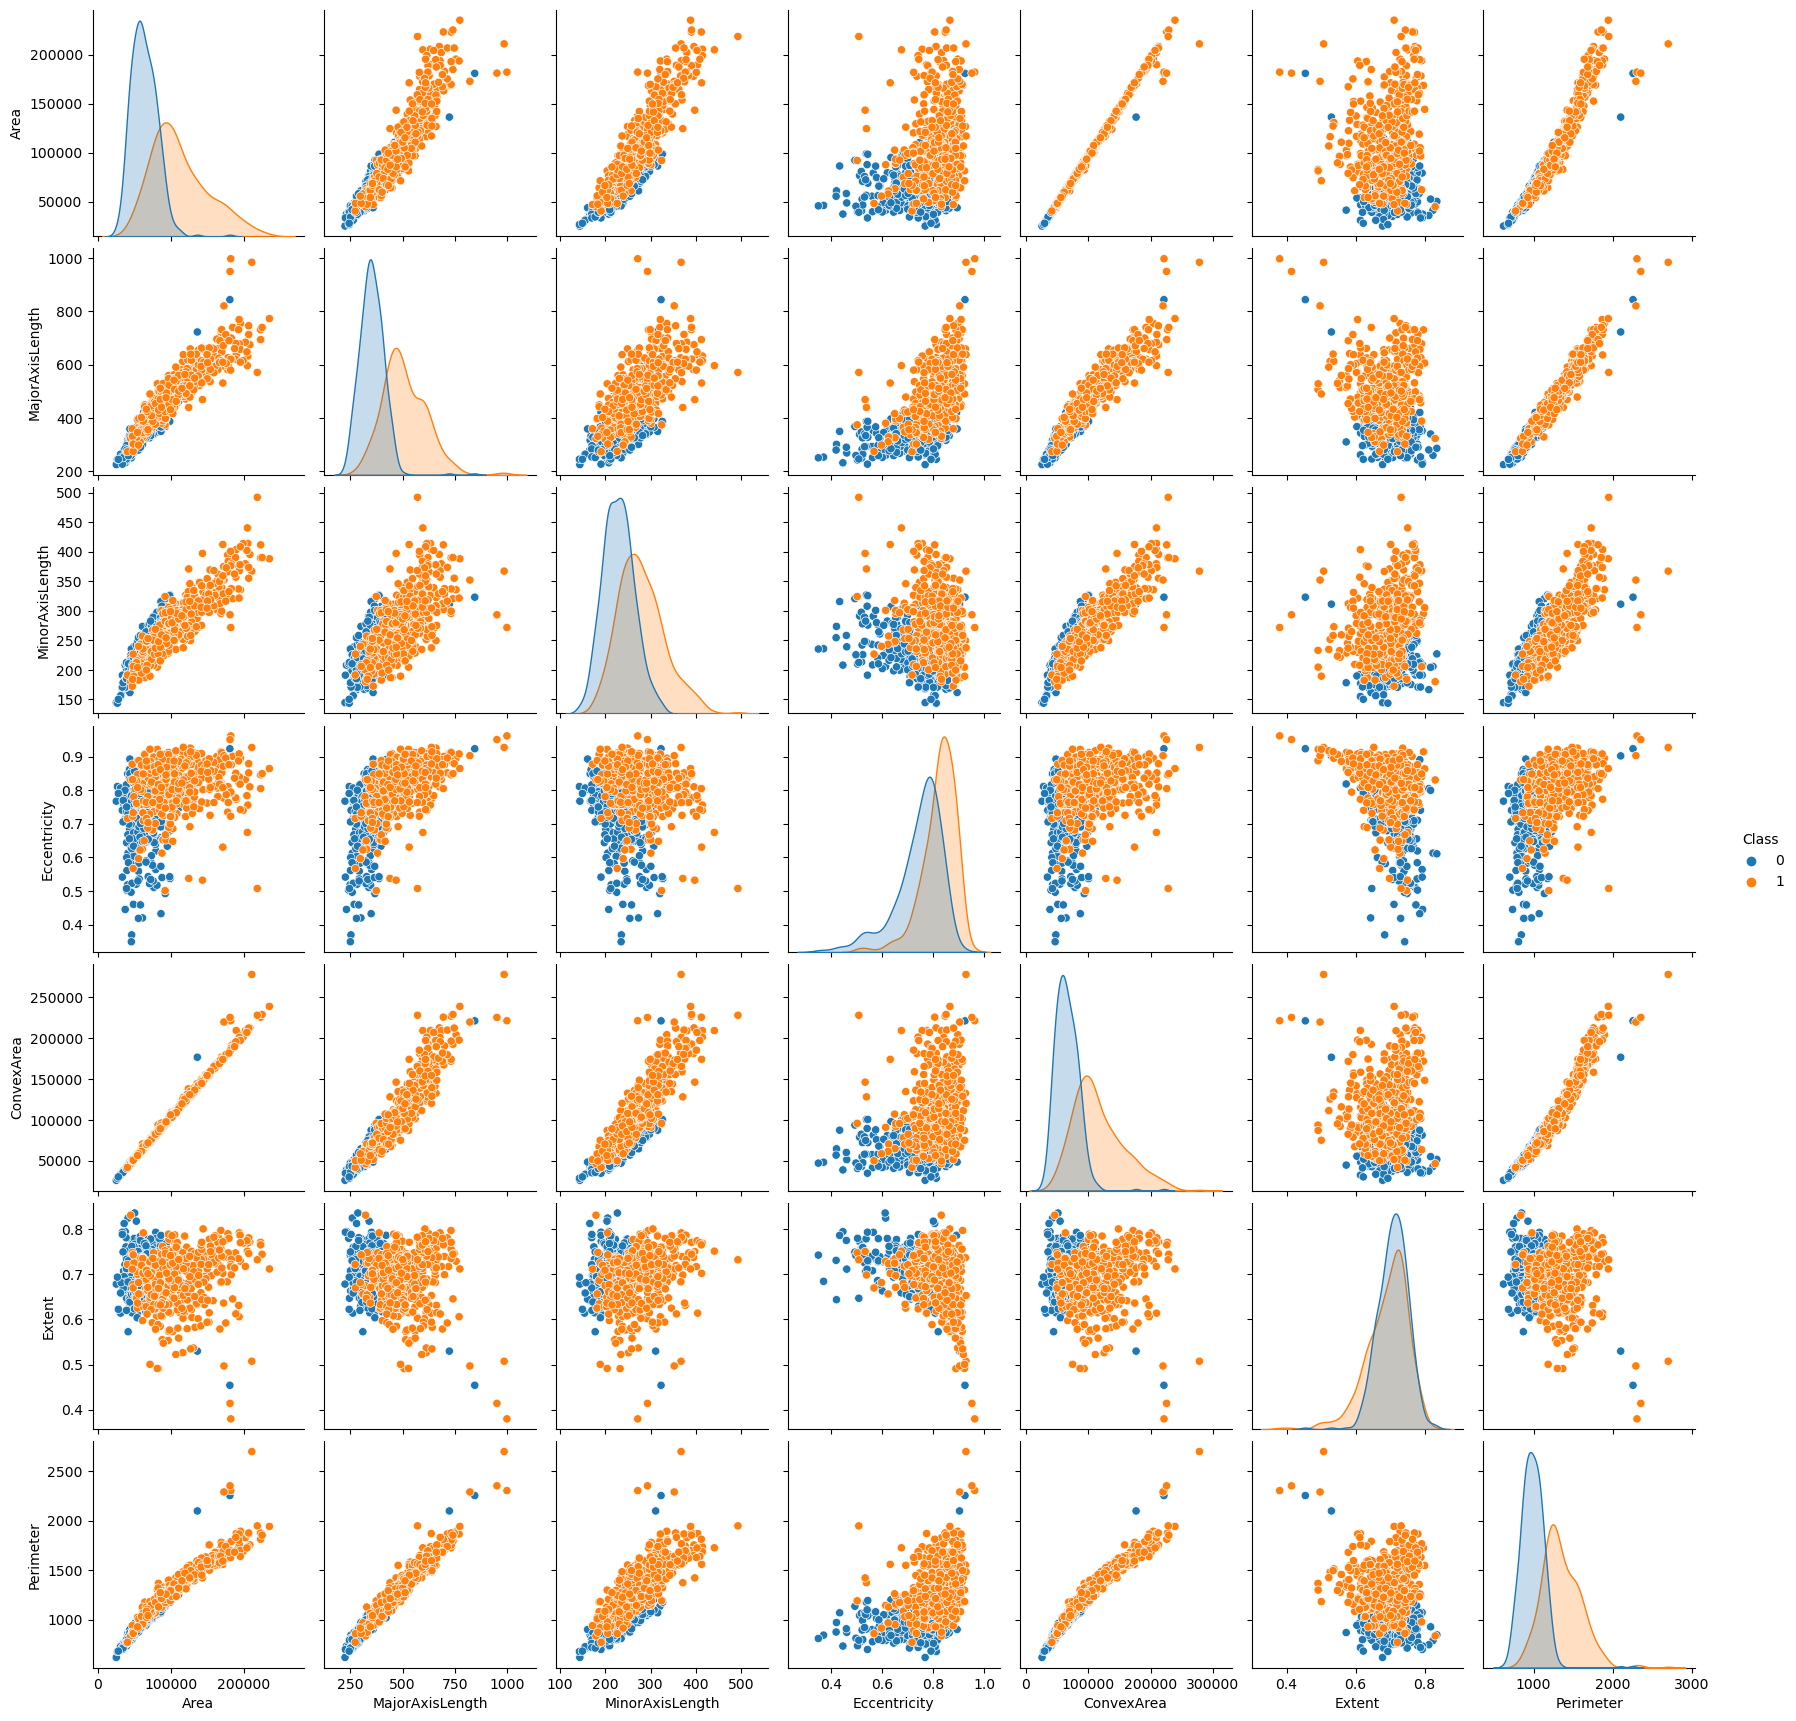

In [15]:
sns.pairplot(df, hue = "Class");

## Train | Test Split and Scaling

In [16]:
X = df.drop("Class", axis = 1)
y = df["Class"]

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import ConfusionMatrixDisplay

In [20]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [21]:
# scale.fit işlemi sadece X_train'e uygulanır. 
X_train_scaled = scaler.fit_transform(X_train) 

In [22]:
# X_test'e transform yapılır.
X_test_scaled = scaler.transform(X_test)

# Logistic Regression

In [23]:
from sklearn.linear_model import LogisticRegression

In [24]:
log_model = LogisticRegression()

In [25]:
log_model.fit(X_train_scaled,y_train)

LogisticRegression()

In [26]:
y_pred = log_model.predict(X_test_scaled)
y_pred

array([1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0], dtype=int64)

In [27]:
y_pred_proba = log_model.predict_proba(X_test_scaled) ## olasılık hesaplarını görmek için kullanılan kod
y_pred_proba

array([[2.22491279e-01, 7.77508721e-01],
       [7.75253213e-01, 2.24746787e-01],
       [9.79163695e-01, 2.08363054e-02],
       [4.08436295e-02, 9.59156370e-01],
       [9.77872377e-01, 2.21276226e-02],
       [5.23348404e-01, 4.76651596e-01],
       [9.84225656e-01, 1.57743439e-02],
       [4.84816531e-01, 5.15183469e-01],
       [6.59357758e-01, 3.40642242e-01],
       [6.58939542e-01, 3.41060458e-01],
       [2.69265792e-01, 7.30734208e-01],
       [2.67269846e-02, 9.73273015e-01],
       [1.16910299e-02, 9.88308970e-01],
       [8.01577900e-01, 1.98422100e-01],
       [1.56067163e-03, 9.98439328e-01],
       [6.23821092e-03, 9.93761789e-01],
       [3.58130951e-01, 6.41869049e-01],
       [9.89458182e-01, 1.05418180e-02],
       [6.25731375e-01, 3.74268625e-01],
       [2.93910459e-01, 7.06089541e-01],
       [8.30680222e-01, 1.69319778e-01],
       [6.18664446e-03, 9.93813356e-01],
       [9.20970758e-01, 7.90292424e-02],
       [8.92049635e-01, 1.07950365e-01],
       [9.584754

## Model Performance

In [28]:
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix

In [29]:
print(confusion_matrix(y_test, y_pred))

[[79 15]
 [11 75]]


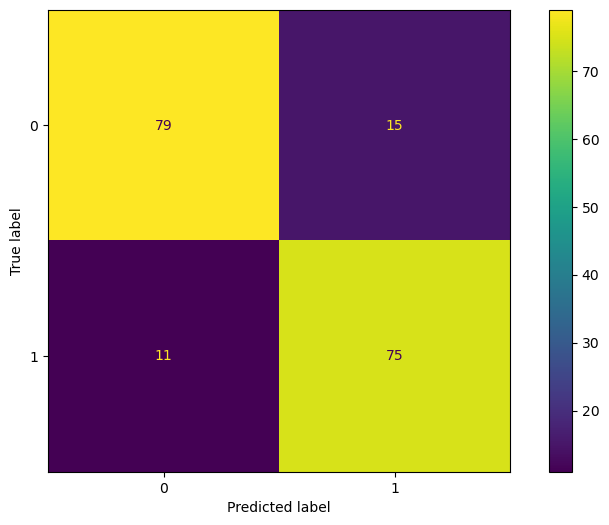

In [30]:
plot_confusion_matrix(log_model, X_test_scaled, y_test);

In [31]:
y_train_pred = log_model.predict(X_train_scaled)
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       0.85      0.89      0.87       356
           1       0.89      0.85      0.87       364

    accuracy                           0.87       720
   macro avg       0.87      0.87      0.87       720
weighted avg       0.87      0.87      0.87       720



### Cross Validate

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate


model = LogisticRegression()
scores = cross_validate(model, 
                        X_train_scaled, 
                        y_train, 
                        scoring = ['accuracy', 'precision','recall','f1'], 
                        cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores

,fit_time,score_time,test_accuracy,test_precision,test_recall,test_f1
1,0.011,0.004,0.847,0.821,0.889,0.853
2,0.005,0.005,0.875,0.935,0.806,0.866
3,0.005,0.004,0.819,0.811,0.833,0.822
4,0.008,0.003,0.944,0.971,0.917,0.943
5,0.008,0.005,0.861,0.906,0.806,0.853
6,0.006,0.005,0.889,0.868,0.917,0.892
7,0.007,0.003,0.778,0.818,0.730,0.771
8,0.006,0.005,0.833,0.879,0.784,0.829
9,0.006,0.003,0.931,0.921,0.946,0.933
10,0.007,0.004,0.903,0.969,0.838,0.899


In [33]:
df_scores.mean()[2:]

test_accuracy    0.868
test_precision   0.890
test_recall      0.846
test_f1          0.866
dtype: float64

In [34]:
print("Test Set")
print(classification_report(y_test,y_pred))

print("Train Set\n")
y_train_pred = log_model.predict(X_train_scaled)
print(classification_report(y_train,y_train_pred))

Test Set
              precision    recall  f1-score   support

           0       0.88      0.84      0.86        94
           1       0.83      0.87      0.85        86

    accuracy                           0.86       180
   macro avg       0.86      0.86      0.86       180
weighted avg       0.86      0.86      0.86       180

Train Set

              precision    recall  f1-score   support

           0       0.85      0.89      0.87       356
           1       0.89      0.85      0.87       364

    accuracy                           0.87       720
   macro avg       0.87      0.87      0.87       720
weighted avg       0.87      0.87      0.87       720



In [35]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [36]:
eval_metric(log_model, X_train_scaled, y_train, X_test_scaled, y_test)

Test_Set
[[79 15]
 [11 75]]
              precision    recall  f1-score   support

           0       0.88      0.84      0.86        94
           1       0.83      0.87      0.85        86

    accuracy                           0.86       180
   macro avg       0.86      0.86      0.86       180
weighted avg       0.86      0.86      0.86       180


Train_Set
[[317  39]
 [ 56 308]]
              precision    recall  f1-score   support

           0       0.85      0.89      0.87       356
           1       0.89      0.85      0.87       364

    accuracy                           0.87       720
   macro avg       0.87      0.87      0.87       720
weighted avg       0.87      0.87      0.87       720



### GridSearchCV

In [37]:
from sklearn.model_selection import GridSearchCV

In [38]:
log_model = LogisticRegression(max_iter=10000, 
                               random_state =42,)

penalty = ["l1", "l2"]
C = np.logspace(-1, 5, 20)
param_grid = {
    "solver": ['liblinear', 'saga'],
    "penalty": penalty,
     "C" : C
}


grid_model = GridSearchCV(log_model,
                          param_grid = param_grid,
                          cv=10)

In [39]:
grid_model.fit(X_train_scaled, y_train)

GridSearchCV(cv=10,
             estimator=LogisticRegression(max_iter=10000, random_state=42),
             param_grid={'C': array([1.00000000e-01, 2.06913808e-01, 4.28133240e-01, 8.85866790e-01,
       1.83298071e+00, 3.79269019e+00, 7.84759970e+00, 1.62377674e+01,
       3.35981829e+01, 6.95192796e+01, 1.43844989e+02, 2.97635144e+02,
       6.15848211e+02, 1.27427499e+03, 2.63665090e+03, 5.45559478e+03,
       1.12883789e+04, 2.33572147e+04, 4.83293024e+04, 1.00000000e+05]),
                         'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga']})

In [40]:
grid_model.best_params_

{'C': 0.42813323987193935, 'penalty': 'l1', 'solver': 'saga'}

In [41]:
grid_model.best_score_ # default: accuracy

0.8680555555555556

In [42]:
y_pred = grid_model.predict(X_test_scaled)
y_pred

array([1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0], dtype=int64)

In [43]:
eval_metric(grid_model, X_train_scaled, y_train, X_test_scaled, y_test)

Test_Set
[[79 15]
 [11 75]]
              precision    recall  f1-score   support

           0       0.88      0.84      0.86        94
           1       0.83      0.87      0.85        86

    accuracy                           0.86       180
   macro avg       0.86      0.86      0.86       180
weighted avg       0.86      0.86      0.86       180


Train_Set
[[315  41]
 [ 54 310]]
              precision    recall  f1-score   support

           0       0.85      0.88      0.87       356
           1       0.88      0.85      0.87       364

    accuracy                           0.87       720
   macro avg       0.87      0.87      0.87       720
weighted avg       0.87      0.87      0.87       720



## ROC (Receiver Operating Curve) and AUC (Area Under Curve)

In [44]:
from sklearn.metrics import plot_roc_curve, plot_precision_recall_curve
from sklearn.metrics import roc_auc_score, auc, roc_curve


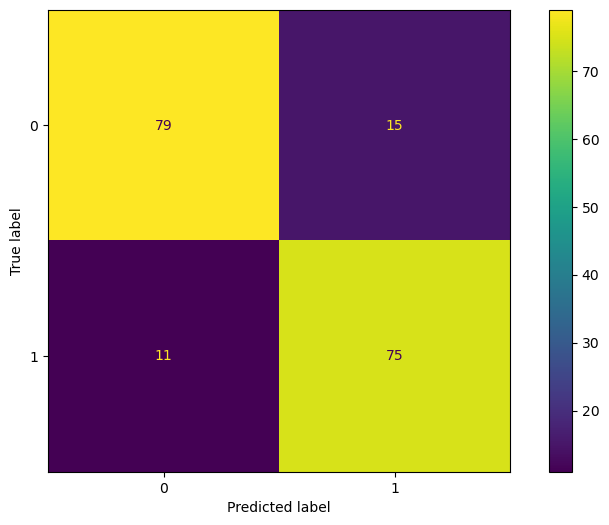

In [45]:
plot_confusion_matrix(grid_model, X_test_scaled, y_test)
plt.show();

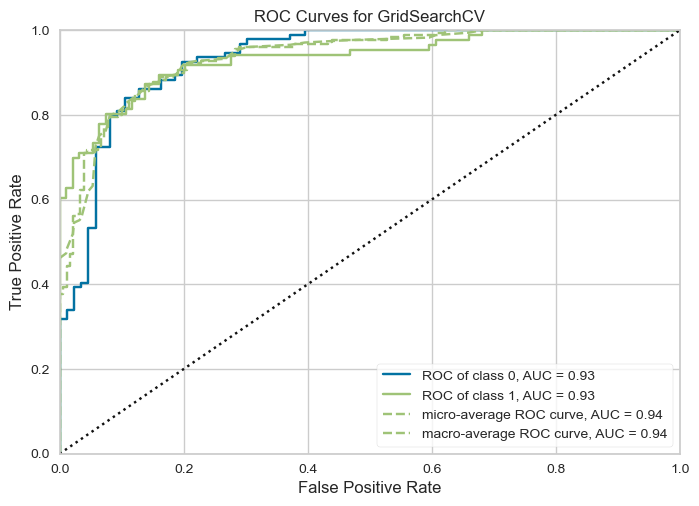

In [46]:
from yellowbrick.classifier import ROCAUC

model = grid_model
visualizer = ROCAUC(model)
visualizer.fit(X_train_scaled, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test_scaled, y_test)        # Evaluate the model on the test data
visualizer.show();

In [47]:
roc_auc_score(y_test, y_pred_proba[:,1])


0.9307273626917367

# Conclusion 

## Final Model

In [48]:
scaler = StandardScaler().fit(X) #bütün datayı scale yapıyorum

In [49]:
import pickle
pickle.dump(scaler, open("scaler_raisin", 'wb')) #scale modelimi kayıt ediyorum

In [50]:
X_scaled_raisin = scaler.transform(X) #sonra transform yapıyorum

In [51]:
final_model = LogisticRegression().fit(X_scaled_raisin, y)#final modelimi oluşturuyorum

In [52]:
pickle.dump(final_model, open("final_model_raisin", 'wb'))#onuda kayıt ediyorum

In [53]:
X.describe().T#describe bakıyorum ki buradaki skorlara yakın skorlar verip tahmin yapacağı

,count,mean,std,min,25%,50%,75%,max
Area,900.000,87804.128,39002.111,25387.000,59348.000,78902.000,105028.250,235047.000
MajorAxisLength,900.000,430.930,116.035,225.630,345.443,407.804,494.187,997.292
MinorAxisLength,900.000,254.488,49.989,143.711,219.111,247.848,279.889,492.275
Eccentricity,900.000,0.782,0.090,0.349,0.742,0.799,0.843,0.962
ConvexArea,900.000,91186.090,40769.290,26139.000,61513.250,81651.000,108375.750,278217.000
Extent,900.000,0.700,0.053,0.380,0.671,0.707,0.735,0.835
Perimeter,900.000,1165.907,273.764,619.074,966.411,1119.509,1308.390,2697.753


In [54]:
my_dict = {"Area": [45000, 78900, 182000],
           "MajorAxisLength": [220, 420, 500],
           "MinorAxisLength": [200, 240, 280],
           "Eccentricity": [0.482, 0.682, 0.882],
           "ConvexArea": [80180, 100186, 12086],
           "Extent": [0.485, 0.694, 0.892], 
           "Perimeter": [1066, 1868, 2275], 
          }
sample = pd.DataFrame(my_dict)
sample

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter
0,45000,220,200,0.482,80180,0.485,1066
1,78900,420,240,0.682,100186,0.694,1868
2,182000,500,280,0.882,12086,0.892,2275


In [55]:
final_model.predict(sample)

array([1, 1, 1], dtype=int64)

In [56]:
scaler_raisin = pickle.load(open("scaler_raisin", "rb")) # model load edilir

In [57]:
sample_raisin_scaled = scaler_raisin.transform(sample) 

# modele (scaler_hearing) df (sample) verilir

sample_raisin_scaled

array([[-1.09809254, -1.81882201, -1.09061067, -3.3183567 , -0.27011041,
        -4.01410924, -0.36513957],
       [-0.22842555, -0.09424757, -0.28998814, -1.1027375 ,  0.22087493,
        -0.1030704 ,  2.56601647],
       [ 2.41649089,  0.59558221,  0.51063439,  1.11288171, -1.94126684,
         3.60212429,  4.05352334]])

In [58]:
final_model = pickle.load(open("final_model_raisin", "rb"))

# Model kuruldu

In [59]:
predictions = final_model.predict(sample_raisin_scaled) 
predictions
# final modele predict için scale edilen sample verilir

array([0, 1, 1], dtype=int64)

In [60]:
predictions_proba = final_model.predict_proba(sample_raisin_scaled) 
# samplenin proba değerlerini alırız

predictions_proba

array([[7.84773494e-01, 2.15226506e-01],
       [1.62189042e-03, 9.98378110e-01],
       [4.32327439e-05, 9.99956767e-01]])

In [61]:
sample["pred"] = predictions
sample["pred_proba_keçimen"] = predictions_proba[:,0]
sample["pred_proba_besni"] = predictions_proba[:,1]

sample

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,pred,pred_proba_keçimen,pred_proba_besni
0,45000,220,200,0.482,80180,0.485,1066,0,0.785,0.215
1,78900,420,240,0.682,100186,0.694,1868,1,0.002,0.998
2,182000,500,280,0.882,12086,0.892,2275,1,0.000,1.000


## Final model with GridSearch

In [62]:
grid_model.best_params_

{'C': 0.42813323987193935, 'penalty': 'l1', 'solver': 'saga'}

In [63]:
final_model_new = LogisticRegression(C=0.42813323987193935, penalty='l1', solver='liblinear').fit(X_scaled_raisin, y)


In [64]:
prediction2 = final_model_new.predict(sample_raisin_scaled)
prediction_proba2 = final_model_new.predict_proba(sample_raisin_scaled)

In [65]:
sample["pred"] = predictions
sample["pred_proba_keçimen"] = predictions_proba[:,0]
sample["pred_proba_besni"] = predictions_proba[:,1]

sample

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,pred,pred_proba_keçimen,pred_proba_besni
0,45000,220,200,0.482,80180,0.485,1066,0,0.785,0.215
1,78900,420,240,0.682,100186,0.694,1868,1,0.002,0.998
2,182000,500,280,0.882,12086,0.892,2275,1,0.000,1.000


## Pipeline

In [66]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [67]:
operations = [("scaler", StandardScaler()), 
              ("logistic", LogisticRegression())]

In [68]:
pipe_model = Pipeline(steps=operations)

In [69]:
pipe_model.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('logistic', LogisticRegression())])

In [70]:
y_pred = pipe_model.predict(X_test)
y_pred

array([1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0], dtype=int64)

## Change parameters with pipeline

In [91]:
pipe_model.get_params() 

# Seçtiğimiz ML algoritmasına göre ilgili parametre listesini getirir.

{'memory': None,
 'steps': [('scaler', StandardScaler()), ('logistic', LogisticRegression())],
 'verbose': False,
 'scaler': StandardScaler(),
 'logistic': LogisticRegression(),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'logistic__C': 1.0,
 'logistic__class_weight': None,
 'logistic__dual': False,
 'logistic__fit_intercept': True,
 'logistic__intercept_scaling': 1,
 'logistic__l1_ratio': None,
 'logistic__max_iter': 100,
 'logistic__multi_class': 'auto',
 'logistic__n_jobs': None,
 'logistic__penalty': 'l2',
 'logistic__random_state': None,
 'logistic__solver': 'lbfgs',
 'logistic__tol': 0.0001,
 'logistic__verbose': 0,
 'logistic__warm_start': False}

In [92]:
pipe_model.set_params(logistic__max_iter=100)

# Yukarıdaki listeden ihtiyaç duyulan parametre değişikliği yapar.

Pipeline(steps=[('scaler', StandardScaler()),
                ('logistic', LogisticRegression())])

## GridSearch Pipeline

In [93]:
from sklearn.model_selection import GridSearchCV

In [94]:
penalty = ["l1", "l2"]
C = np.logspace(-1, 5, 20)
param_grid = {
    "logistic__solver": ['liblinear', 'saga'],
    "logistic__penalty": penalty,
     "logistic__C" : C
}

In [95]:
operations = [("scaler", StandardScaler()), 
              ("logistic", LogisticRegression())]

In [96]:
pipe_model = Pipeline(steps=operations)

In [97]:
pipe_grid = GridSearchCV(pipe_model, param_grid, cv=10, scoring= "accuracy")

In [100]:
pipe_grid.fit(X_train,y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('logistic', LogisticRegression())]),
             param_grid={'logistic__C': array([1.00000000e-01, 2.06913808e-01, 4.28133240e-01, 8.85866790e-01,
       1.83298071e+00, 3.79269019e+00, 7.84759970e+00, 1.62377674e+01,
       3.35981829e+01, 6.95192796e+01, 1.43844989e+02, 2.97635144e+02,
       6.15848211e+02, 1.27427499e+03, 2.63665090e+03, 5.45559478e+03,
       1.12883789e+04, 2.33572147e+04, 4.83293024e+04, 1.00000000e+05]),
                         'logistic__penalty': ['l1', 'l2'],
                         'logistic__solver': ['liblinear', 'saga']},
             scoring='accuracy')

In [101]:
pipe_grid.best_params_

{'logistic__C': 0.8858667904100825,
 'logistic__penalty': 'l1',
 'logistic__solver': 'liblinear'}

In [102]:
pipe_grid.best_score_ # accuracy

0.8680555555555556

## Final with Pipeline

In [103]:
operations = [("scaler", StandardScaler()), 
              ("logistic", LogisticRegression(C = 0.8858667904100825,
                                             penalty = 'l1',
                                             solver = 'liblinear'))]

# LogisticRegression içindeki hyperparametreleri pipe_grid.best_params_'dan aldık.

In [104]:
pipe_final = Pipeline(operations)

In [105]:
pipe_final.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('logistic',
                 LogisticRegression(C=0.8858667904100825, penalty='l1',
                                    solver='liblinear'))])

## New predictions after pipeline

In [106]:
new_data = {"Area": [45000, 78900, 182000],
           "MajorAxisLength": [220, 420, 500],
           "MinorAxisLength": [200, 240, 280],
           "Eccentricity": [0.482, 0.682, 0.882],
           "ConvexArea": [80180, 100186, 12086],
           "Extent": [0.485, 0.694, 0.892], 
           "Perimeter": [1066, 1868, 2275], 
          }
samples = pd.DataFrame(new_data)
samples

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter
0,45000,220,200,0.482,80180,0.485,1066
1,78900,420,240,0.682,100186,0.694,1868
2,182000,500,280,0.882,12086,0.892,2275


In [107]:
predictions = pipe_final.predict(samples)
predictions

array([0, 1, 1], dtype=int64)

In [108]:
predictions_proba = pipe_final.predict_proba(samples)
predictions_proba

array([[6.16269576e-01, 3.83730424e-01],
       [4.01044702e-05, 9.99959896e-01],
       [2.27868033e-07, 9.99999772e-01]])

In [109]:
samples["pred"] = predictions
samples["pred_proba_keçimen"] = predictions_proba[:,0]
samples["pred_proba_besni"] = predictions_proba[:,1]

samples

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,pred,pred_proba_keçimen,pred_proba_besni
0,45000,220,200,0.482,80180,0.485,1066,0,0.616,0.384
1,78900,420,240,0.682,100186,0.694,1868,1,0.000,1.000
2,182000,500,280,0.882,12086,0.892,2275,1,0.000,1.000


## Comment 
## Result comparison before and after pipeline
### Guesses didn't change. It stayed 0-1-1, however if more indent with closer numbers were given. It could have been different and better results at the end after pipeline processes.

https://github.com/Mamoth111/Data_science_Projects_Techpro